## Linear Algebra and Calculus Assignment
##### Introduction
This assignment covers three main topics: Linear Algebra, Calculus, and Data Processing and visualisation techniques. You will implement Principal Component Analysis (PCA) for image compression and a basic gradient descent algorithm for linear regression. After that you will work on solving problems posed on tabular data with the help of pandas library.
### Part 1: Linear Algebra - Principal Component Analysis (PCA)
Problem Statement - **Implement PCA to compress a grayscale image**  
Break down the PCA algorithm into the following steps:

1. Load and preprocess the image
2. Compute the covariance matrix
3. Compute eigenvectors and eigenvalues
4. Select top k eigenvectors
5. Project the data onto the new subspace
6. Reconstruct the compressed image
7. Bring it all together in the main function


<div>
  <a href="https://colab.research.google.com/github/emharsha1812/CCE_Assignment/blob/main/Assignments/Linear_Algebra.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>
</div>

In [1]:
! pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 43.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 69.1 MB/s eta 0:00:00:00:01


### 1.0 Loading and preprocessing the image  

**Already Done**  Load a grayscale image using an appropriate library  
**Already Done**: Reshape the image into a 2D array where each row represents a pixel

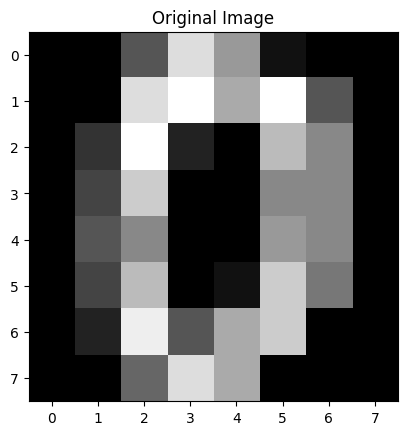

Original image shape: (8, 8)
Total number of pixels: 64


In [2]:
# IMP - We've provided the code to load and preprocess the image data. You don't need to modify this section.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reshape the first image
image = X[0].reshape(8, 8)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

print(f"Original image shape: {image.shape}")
print(f"Total number of pixels: {image.size}")

### 1.1 Compute the covariance matrix

**TODO**: Center the data by subtracting the mean of each feature  
**TODO**: Compute the covariance matrix of the centered data

In [3]:
# 1.1 Compute the covariance matrix
def compute_covariance_matrix(X):
    """
    Compute the covariance matrix for the input data.
    
    Args:
    X (numpy.ndarray): Input data matrix
    
    Returns:
    numpy.ndarray: Covariance matrix
    """
    # TODO: Implement the covariance matrix calculation
    # Hint: Remember to center the data by subtracting the mean
    # Avoid division by zero by adding a small epsilon value
    X_centered = X - np.mean(X, axis=0)
    n_samples = X.shape[0]
    covariance_matrix = (1 / (n_samples - 1)) * np.dot(X_centered.T, X_centered)
    
    return covariance_matrix

X = digits.data
cov_matrix = compute_covariance_matrix(X)

print("Covariance matrix shape:", cov_matrix.shape)


Covariance matrix shape: (64, 64)



### 1.2 Compute eigenvectors and eigenvalues

**TODO**: Implement a function to compute eigenvectors and eigenvalues of the covariance matrix  
**Hint**: You can use NumPy's linalg.eig function, but try to implement it yourself for learning purposes

In [4]:
# 1.2 Compute eigenvectors and eigenvalues
def compute_eigenvectors_eigenvalues(cov_matrix):
    """
    Compute the eigenvectors and eigenvalues of the covariance matrix.
    
    Args:
    cov_matrix (numpy.ndarray): Covariance matrix
    
    Returns:
    tuple: (eigenvalues, eigenvectors)
    """
    # TODO: Implement eigenvector and eigenvalue calculation
    # Hint: Use numpy.linalg.eigh() for symmetric matrices
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    return eigenvalues, eigenvectors


### 1.3 Select top k eigenvectors

**TODO**: Implement a function to select the top k eigenvectors based on their corresponding eigenvalues  
**TODO**: Create a projection matrix using these eigenvectors

In [5]:
# 1.3 Select top k eigenvectors
def select_top_k_eigenvectors(eigenvalues, eigenvectors, k):
    """
    Select the top k eigenvectors based on eigenvalues.
    
    Args:
    eigenvalues (numpy.ndarray): Array of eigenvalues
    eigenvectors (numpy.ndarray): Matrix of eigenvectors
    k (int): Number of top eigenvectors to select
    
    Returns:
    numpy.ndarray: Top k eigenvectors
    """
    # TODO: Implement the selection of top k eigenvectors
    # Hint: Sort eigenvalues and select corresponding eigenvectors
    k = min(k, eigenvectors.shape[1])

    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_k_indices = sorted_indices[:k]
    top_k_eigenvectors = eigenvectors[:, top_k_indices]
    
    return top_k_eigenvectors


### 1.4 Project the data onto the new subspace

**TODO**: Project the centered data onto the new subspace defined by the top k eigenvectors  

In [6]:
# 1.4 Project the data onto the new subspace
def project_data(X, eigenvectors):
    """
    Project the data onto the new subspace defined by the eigenvectors.
    
    Args:
    X (numpy.ndarray): Input data matrix
    eigenvectors (numpy.ndarray): Matrix of selected eigenvectors
    
    Returns:
    numpy.ndarray: Projected data
    """
    # TODO: Implement the data projection
    # Hint: Center the data and then project it onto the eigenvectors
    X_centered = X - np.mean(X, axis=0)
    projected_data = np.dot(X_centered, eigenvectors)
    
    return projected_data

### 1.5 Reconstruct the compressed image

**TODO**: Implement a function to reconstruct the compressed image from the projected data  

In [7]:

# 1.5 Reconstruct the compressed image
def reconstruct_image(X_projected, eigenvectors, original_mean):
    """
    Reconstruct the compressed image from the projected data.
    
    Args:
    X_projected (numpy.ndarray): Projected data
    eigenvectors (numpy.ndarray): Matrix of selected eigenvectors
    original_mean (numpy.ndarray): Mean of the original data
    
    Returns:
    numpy.ndarray: Reconstructed data
    """
    # TODO: Implement the image reconstruction
    # Hint: Project back to the original space and add the mean
    X_reconstructed = np.dot(X_projected, eigenvectors.T)
    X_reconstructed += original_mean
    
    return X_reconstructed

### 1.6 Complete the main function

In [8]:
# Main PCA function
def perform_pca(X, k):
    """
    Perform PCA on the input data.
    
    Args:
    X (numpy.ndarray): Input data matrix
    k (int): Number of principal components to keep
    
    Returns:
    tuple: (compressed_data, reconstructed_data, eigenvectors)
    """
    # TODO: Implement the main PCA function using the helper functions above
    # 1. Compute the covariance matrix
    # 2. Compute eigenvectors and eigenvalues
    # 3. Select top k eigenvectors
    # 4. Project the data
    # 5. Reconstruct the data
    cov_matrix = compute_covariance_matrix(X)

    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)

    top_k_eigenvectors = select_top_k_eigenvectors(eigenvalues, eigenvectors, k)

    compressed_data = project_data(X, top_k_eigenvectors)

    original_mean = np.mean(X, axis=0)
    reconstructed_data = reconstruct_image(compressed_data, top_k_eigenvectors, original_mean)
    
    return compressed_data, reconstructed_data, top_k_eigenvectors

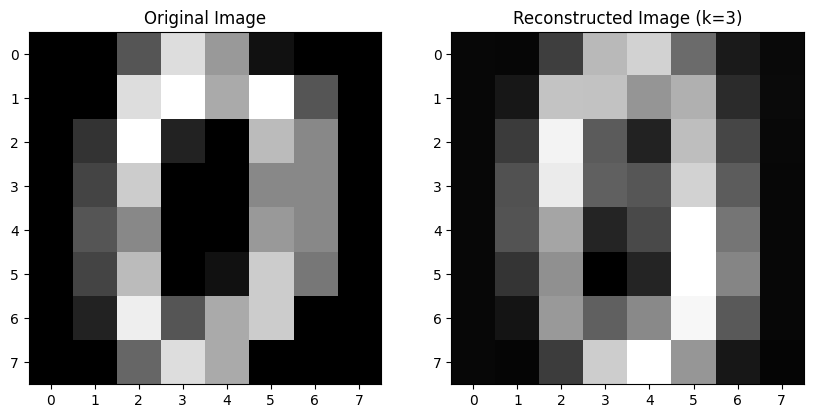

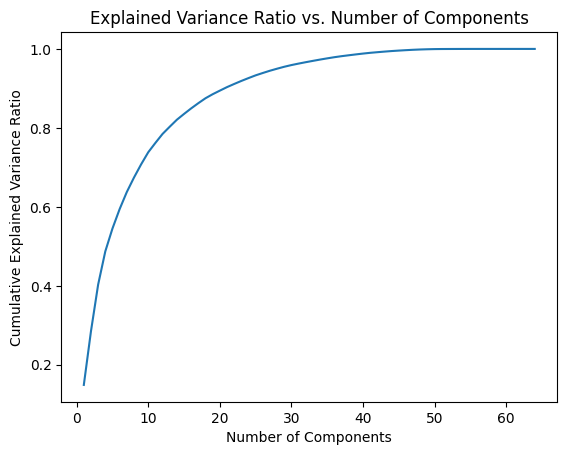

In [9]:
# Test the implementation
k = 3  # Number of principal components to keep
compressed_data, reconstructed_data, eigenvectors = perform_pca(X, k)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data[0].reshape(8, 8), cmap='gray')
plt.title(f'Reconstructed Image (k={k})')
plt.show()

# Bonus: Determine optimal number of principal components
def explained_variance_ratio(eigenvalues):
    return eigenvalues / np.sum(eigenvalues)

# Plot the cumulative explained variance ratio vs. number of components
cov_matrix = compute_covariance_matrix(X)
eigenvalues, _ = compute_eigenvectors_eigenvalues(cov_matrix)
evr = explained_variance_ratio(eigenvalues)
cumulative_evr = np.cumsum(evr)

plt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()